In [58]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

In [59]:
df_fraude= pd.read_csv("PS_20174392719_1491204439457_log.csv")

In [60]:
df_fraude.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [61]:
df_fraude.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [62]:
df_fraude.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [63]:
df_fraude.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [64]:
df_fraude["nameOrig"]=df_fraude["nameOrig"].str[1:].astype(int)
df_fraude["nameOrig"]

0          1231006815
1          1666544295
2          1305486145
3           840083671
4          2048537720
              ...    
6362615     786484425
6362616    1529008245
6362617    1162922333
6362618    1685995037
6362619    1280323807
Name: nameOrig, Length: 6362620, dtype: int32

In [65]:
df_fraude["nameDest"]
dummies=df_fraude["nameDest"].str[0]
dummies=pd.get_dummies(dummies,drop_first=True,dtype=int)
dummies




,M
0,1
1,1
2,0
3,0
4,1
...,...
6362615,0
6362616,0
6362617,0
6362618,0


In [66]:
df_fraude["nameDest"]=df_fraude["nameDest"].str[1:].astype(int)
df_fraude=pd.concat([df_fraude,dummies],axis=1)
df_fraude

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,M
0,1,PAYMENT,9839.64,1231006815,170136.00,160296.36,1979787155,0.00,0.00,0,0,1
1,1,PAYMENT,1864.28,1666544295,21249.00,19384.72,2044282225,0.00,0.00,0,0,1
2,1,TRANSFER,181.00,1305486145,181.00,0.00,553264065,0.00,0.00,1,0,0
3,1,CASH_OUT,181.00,840083671,181.00,0.00,38997010,21182.00,0.00,1,0,0
4,1,PAYMENT,11668.14,2048537720,41554.00,29885.86,1230701703,0.00,0.00,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,786484425,339682.13,0.00,776919290,0.00,339682.13,1,0,0
6362616,743,TRANSFER,6311409.28,1529008245,6311409.28,0.00,1881841831,0.00,0.00,1,0,0
6362617,743,CASH_OUT,6311409.28,1162922333,6311409.28,0.00,1365125890,68488.84,6379898.11,1,0,0
6362618,743,TRANSFER,850002.52,1685995037,850002.52,0.00,2080388513,0.00,0.00,1,0,0


In [67]:
df_fraude=pd.get_dummies(df_fraude,columns=["type"],dtype=int,drop_first=True)
df_fraude

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,M,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839.64,1231006815,170136.00,160296.36,1979787155,0.00,0.00,0,0,1,0,0,1,0
1,1,1864.28,1666544295,21249.00,19384.72,2044282225,0.00,0.00,0,0,1,0,0,1,0
2,1,181.00,1305486145,181.00,0.00,553264065,0.00,0.00,1,0,0,0,0,0,1
3,1,181.00,840083671,181.00,0.00,38997010,21182.00,0.00,1,0,0,1,0,0,0
4,1,11668.14,2048537720,41554.00,29885.86,1230701703,0.00,0.00,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682.13,786484425,339682.13,0.00,776919290,0.00,339682.13,1,0,0,1,0,0,0
6362616,743,6311409.28,1529008245,6311409.28,0.00,1881841831,0.00,0.00,1,0,0,0,0,0,1
6362617,743,6311409.28,1162922333,6311409.28,0.00,1365125890,68488.84,6379898.11,1,0,0,1,0,0,0
6362618,743,850002.52,1685995037,850002.52,0.00,2080388513,0.00,0.00,1,0,0,0,0,0,1


In [68]:
df_fraude[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']] = df_fraude[['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']].astype(int)
df_fraude

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,M,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
0,1,9839,1231006815,170136,160296,1979787155,0,0,0,0,1,0,0,1,0
1,1,1864,1666544295,21249,19384,2044282225,0,0,0,0,1,0,0,1,0
2,1,181,1305486145,181,0,553264065,0,0,1,0,0,0,0,0,1
3,1,181,840083671,181,0,38997010,21182,0,1,0,0,1,0,0,0
4,1,11668,2048537720,41554,29885,1230701703,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,339682,786484425,339682,0,776919290,0,339682,1,0,0,1,0,0,0
6362616,743,6311409,1529008245,6311409,0,1881841831,0,0,1,0,0,0,0,0,1
6362617,743,6311409,1162922333,6311409,0,1365125890,68488,6379898,1,0,0,1,0,0,0
6362618,743,850002,1685995037,850002,0,2080388513,0,0,1,0,0,0,0,0,1


In [69]:
df_fraude.dtypes

step              int64
amount            int32
nameOrig          int32
oldbalanceOrg     int32
newbalanceOrig    int32
nameDest          int32
oldbalanceDest    int32
newbalanceDest    int32
isFraud           int64
isFlaggedFraud    int64
M                 int32
type_CASH_OUT     int32
type_DEBIT        int32
type_PAYMENT      int32
type_TRANSFER     int32
dtype: object

In [70]:
target=df_fraude["isFraud"]
df_fraude.drop("isFraud",axis=1,inplace=True)
xtrain,xtest,ytrain,ytest = train_test_split(df_fraude,
                                             target,
                                             test_size=0.25,
                                             random_state=14,
                                             stratify=target
                                             )

In [71]:
xtrain.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFlaggedFraud,M,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER
5112638,355,2229,1817808781,68466,66236,1425123128,62079,64309,0,0,0,1,0,0
52516,9,13174,1083326435,0,0,1661782773,0,0,0,1,0,0,1,0
5136520,356,174216,1468259770,1607020,1781236,375452991,389239,215022,0,0,0,0,0,0
4009636,298,1361649,1447187835,23954,0,341759038,182633,1544282,0,0,0,0,0,1
5616222,395,154009,380457960,0,0,180818642,739980,893989,0,0,1,0,0,0


In [72]:
xtrain.shape

(4771965, 14)

In [73]:
ytrain.head()

5112638    0
52516      0
5136520    0
4009636    0
5616222    0
Name: isFraud, dtype: int64

In [74]:
ytrain.shape

(4771965,)

# ENTRENAMIENTO DE MODELO

In [75]:
#ENTRENAR MODELO LOGICTIC REGRESSION
from sklearn.linear_model import LogisticRegression

#ENTRENAMOS EL MODELO
logreg = LogisticRegression(random_state=17, max_iter=2000)
logreg.fit(xtrain, ytrain)

#PREDICCIONES
y_pred = logreg.predict(xtest)

In [76]:
#MATRIZ DE CONFUSION
from sklearn.metrics import confusion_matrix
import seaborn as sns
# confusion_matrix = confusion_matrix(ytest, y_pred)
# # #PLOT THE MATRIX
# sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [77]:
from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix
# from sklearn.metrics import classification_report
# import seaborn as sns
# #ENTRENAR MODELO RANDOM FOREST


# #ENTRENAMOS EL MODELO
rfc = RandomForestClassifier(n_estimators=20, max_depth=35, random_state=0, n_jobs=-1)
rfc.fit(xtrain, ytrain)


RandomForestClassifier(max_depth=35, n_estimators=20, n_jobs=-1, random_state=0)

In [78]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:

# #PREDICCIONES
y_pred = rfc.predict(xtest)



In [80]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

<Axes: >

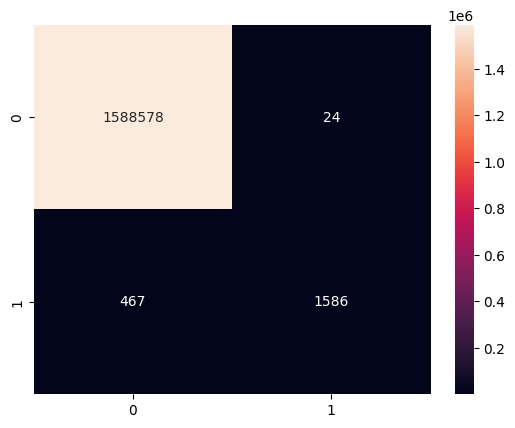

In [81]:
# #MATRIZ DE CONFUSION

confusion_matrix = confusion_matrix(ytest, y_pred)

# #PLOT THE MATRIX
sns.heatmap(confusion_matrix, annot=True, fmt='d')

In [82]:

# #PREDICCIONES
# y_pred = rfc.predict(xtest)

# #MATRIZ DE CONFUSION

# confusion_matrix = confusion_matrix(ytest, y_pred)

# #PLOT THE MATRIX
# sns.heatmap(confusion_matrix, annot=True, fmt='d')

# #PRINT DEL REPORT CLASSIFICATION

# print(classification_report(ytest, y_pred))